# Generate results plot from raw data

Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

Read raw data

In [18]:
df = pd.read_csv("../results/raw_data.csv")

def get_instrument_scores(df: pd.DataFrame, prefix: str) -> np.ndarray:
    cols = [col for col in df.columns if col.strip().startswith(prefix)]
    data = df[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
    return data.sum(axis=0).values

ans_drum = get_instrument_scores(df, "Drum")
n_drum = df[[col for col in df.columns if col.strip().startswith("Drum")]].notna().any(axis=1).sum()
x_drum = np.array([50, 100, 150, 200, 250, 300, 350])

ans_vocal = get_instrument_scores(df, "Vocal")
n_vocal = df[[col for col in df.columns if col.strip().startswith("Vocal")]].notna().any(axis=1).sum()
x_vocal = np.array([10, 20, 30, 40, 50, 60, 70])

ans_flute = get_instrument_scores(df, "Flute")
n_flute = df[[col for col in df.columns if col.strip().startswith("Flute")]].notna().any(axis=1).sum()
x_flute = np.array([1, 3, 5, 7, 9, 11, 13])

Calculate 95 % confidence level lines

In [19]:
c_drum = (n_drum/2 + np.sqrt(n_drum)) * 100 / n_drum
c_vocal = (n_vocal/2 + np.sqrt(n_vocal)) * 100 / n_vocal
c_flute = (n_flute/2 + np.sqrt(n_flute)) * 100 / n_flute

Plot results

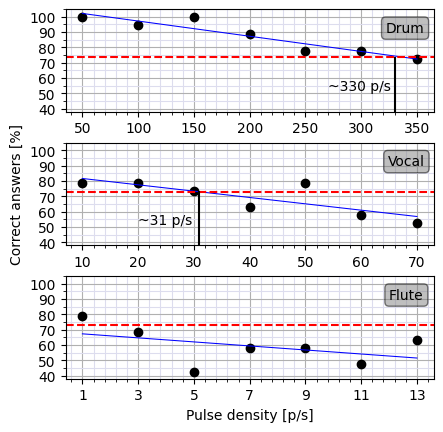

In [20]:
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)

plt.subplot(3,1,1)
plt.grid()
plt.grid(True, 'minor', color='#ddddee')
plt.gca().set_axisbelow(True)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.gca().xaxis.set_minor_locator(MultipleLocator(10))
plt.ylim(38, 105)

plt.scatter(x_drum, ans_drum * 100 / n_drum, c='k')
z = np.polyfit(x_drum, ans_drum * 100 / n_drum, 1)
p = np.poly1d(z)
plt.plot(x_drum,p(x_drum),"b", linewidth=0.75)
plt.axhline(y = c_drum, color='r', ls='--')
plt.axvline(x = 330, ymax=0.52, color='k')
plt.text(322, 90, 'Drum', bbox=props)
plt.text(270, 52, '~330 p/s')

plt.subplot(3,1,2)
plt.grid()
plt.grid(True, 'minor', color='#ddddee')
plt.gca().set_axisbelow(True)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.gca().xaxis.set_minor_locator(MultipleLocator(2))
plt.ylim(38, 105)

plt.scatter(x_vocal, ans_vocal * 100 / n_vocal, c='k')
z = np.polyfit(x_vocal, ans_vocal * 100 / n_vocal, 1)
p = np.poly1d(z)
plt.plot(x_vocal,p(x_vocal),"b", linewidth=0.75)
plt.axhline(y = c_vocal, color='r', ls='--')
plt.axvline(x = 31, ymax=0.52, color='k')
plt.text(64.8, 90, 'Vocal', bbox=props)
plt.text(20, 52, '~31 p/s')
plt.ylabel('Correct answers [%]')

plt.subplot(3,1,3)
plt.grid()
plt.grid(True, 'minor', color='#ddddee')
plt.gca().set_axisbelow(True)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))
plt.gca().xaxis.set_major_locator(MultipleLocator(2, 1))
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.4, 1))
plt.ylim(38, 105)

plt.scatter(x_flute, ans_flute * 100 / n_flute, c='k')
z = np.polyfit(x_flute, ans_flute * 100 / n_flute, 1)
p = np.poly1d(z)
plt.plot(x_flute,p(x_flute),"b-", linewidth=0.75)
plt.axhline(y = c_flute, color='r', ls='--')
plt.text(12, 90, 'Flute', bbox=props)
plt.xlabel('Pulse density [p/s]')
plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=0.3)
plt.show()